In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
list_movie= pd.read_csv("C:\\Users\\negar\\Documents\\New folder\\Python Projects\\movie project\\df_final_movie_imdb.csv")

In [3]:
budget_effect=list_movie.loc[:,["budget", "gross"]]

In [4]:
def normalizing_features(df):
    new_df=(df-df.mean())/df.std()
    return new_df 

budget_effect["normalized_budget"]=normalizing_features(budget_effect["budget"])
budget_effect["normalized_gross"]=normalizing_features(budget_effect["gross"])

In [5]:
lm=LinearRegression()
lm.fit(budget_effect[["normalized_budget"]],budget_effect[["normalized_gross"]])
y_hat=lm.predict(budget_effect[["normalized_budget"]])
b=lm.intercept_
a=lm.coef_

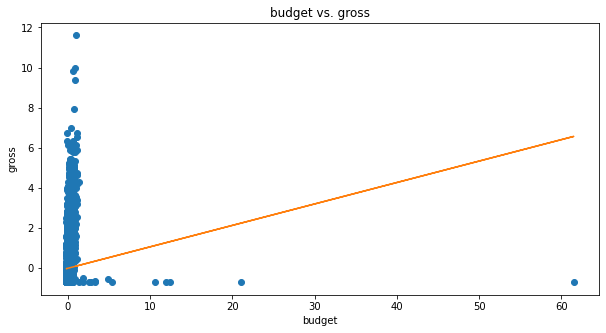

In [6]:
#draw budget vs gross
plt.figure(figsize=(10,5))
plt.scatter (budget_effect[["normalized_budget"]],budget_effect[["normalized_gross"]])
plt.plot(budget_effect[["normalized_budget"]], y_hat, '-', color='C1')
plt.title("budget vs. gross")
plt.xlabel("budget")
plt.ylabel("gross")
plt.show()

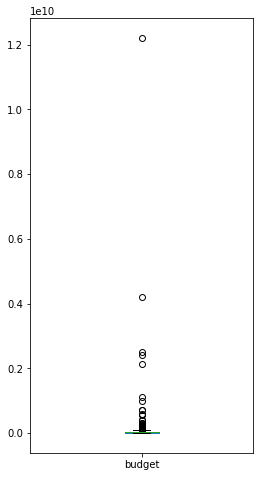

In [7]:
#big outliers makes a mess in the daya analyzing 
budget_effect[["budget"]].plot(kind="box", figsize=(4,8))

In [8]:
#remove autlier from budget
def find_IQR (df):
    sort=sorted(df)
    Q1=sort[int(len(sort)*0.25)]
    Q3=sort[int(len(sort)*0.75)]
    return(Q3-Q1)

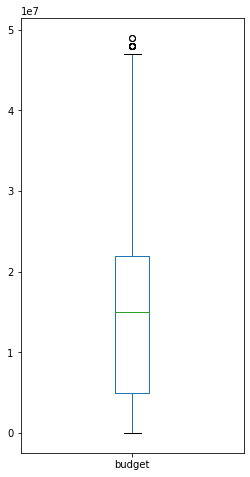

In [9]:
budget_IQR = find_IQR (budget_effect["budget"])
#out[]: 33000000.0
bgt_effect_no_out = pd.DataFrame(budget_effect[budget_effect["budget"] <= budget_IQR*1.5])

bgt_effect_no_out["budget"].plot(kind="box", figsize=(4,8))
#still I could go further to remove budgets>3*IQR

In [10]:
#normalizing new data:
bgt_effect_no_out["normalized_budget"]=normalizing_features(bgt_effect_no_out["budget"].values)
bgt_effect_no_out["normalized_gross"]=normalizing_features(bgt_effect_no_out["gross"].values)

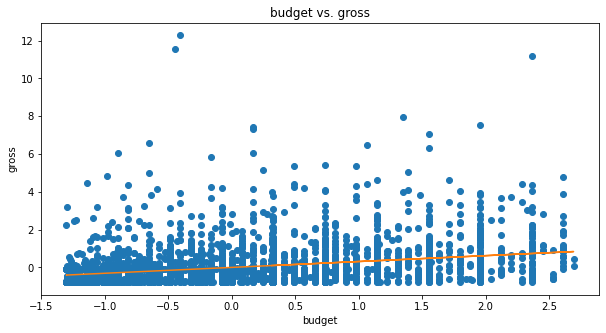

In [11]:
lm.fit(bgt_effect_no_out[["normalized_budget"]],bgt_effect_no_out[["normalized_gross"]])
y_hat=lm.predict(bgt_effect_no_out[["normalized_budget"]])
b=lm.intercept_
a=lm.coef_

plt.figure(figsize=(10,5))
plt.scatter (bgt_effect_no_out[["normalized_budget"]],bgt_effect_no_out[["normalized_gross"]])
plt.title("budget vs. gross")
plt.xlabel("budget")
plt.ylabel("gross")
plt.plot(bgt_effect_no_out[["normalized_budget"]], y_hat, '-', color='C1')
plt.show()

In [12]:
lm.score(bgt_effect_no_out[["normalized_budget"]],bgt_effect_no_out[["normalized_gross"]])

0.09653157253543232

In [13]:
bgt_effect_no_out[["normalized_budget", "normalized_gross"]].corr(method="pearson")

,normalized_budget,normalized_gross
normalized_budget,1.000000,0.310695
normalized_gross,0.310695,1.000000


In [14]:
#it shows no meaningful correleation between movie budget and gross